In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


file_path = "C:\\Users\\pc\\Documents\\jupyter_notebook\\Online_Retail.xlsx"
data = pd.read_excel(file_path, engine="openpyxl")
print("Dataset loaded successfully!")

print(data.head())


Dataset loaded successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [3]:

# Remove rows with missing CustomerID as they are essential for customer analysis.
data = data[data['CustomerID'].notnull()]

# Convert InvoiceDate from string to datetime for proper time-based operations.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Optional: Remove negative quantities if they indicate returns or errors
data = data[data['Quantity'] > 0]

In [4]:
# Create a new column "TotalPrice" as Quantity multiplied by UnitPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [5]:


# Data Aggregation and Analysis
# Resample the data on a monthly basis using the InvoiceDate as the index.
# First, set InvoiceDate as the index.
data.set_index('InvoiceDate', inplace=True)
monthly_sales = data['TotalPrice'].resample('ME').sum()

# Print aggregated monthly sales for a quick check
print("\nMonthly Sales:")
print(monthly_sales)


Monthly Sales:
InvoiceDate
2010-12-31     572713.890
2011-01-31     569445.040
2011-02-28     447137.350
2011-03-31     595500.760
2011-04-30     469200.361
2011-05-31     678594.560
2011-06-30     661213.690
2011-07-31     600091.011
2011-08-31     645343.900
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
2011-12-31     518192.790
Freq: ME, Name: TotalPrice, dtype: float64


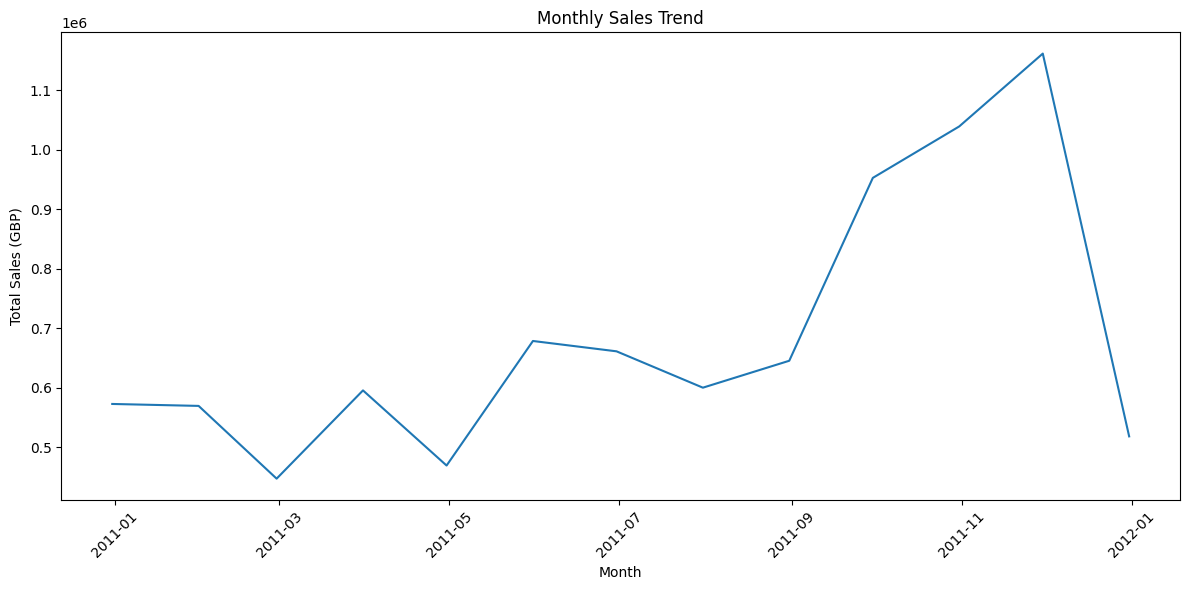

In [6]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (GBP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

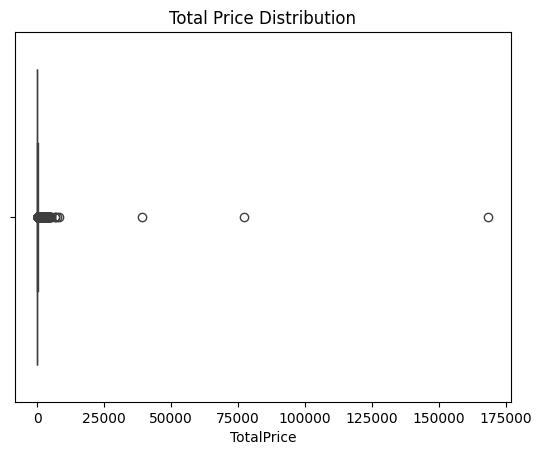

In [7]:
sns.boxplot(x=data['TotalPrice'])
plt.title('Total Price Distribution')
plt.show()
